## UNIVERSIDAD CENTRAL DEL ECUADOR
### Facultad de Ingeniería y Ciencias Aplicadas
### Criptografía y Seguridad de la Información
**Fecha de entrega:** 14-noviembre-2025

**Grupo 2**

**Integrantes:**


*   Andino Jhon
*   Borja Diego
*   Cajamarca Anthony
*   Cruz Kevin
*   Jami Mateo

# **CRIPTOGRAFÍA SIMÉTRICA: Blowfish**

**Blowfish**

Blowfish es un algoritmo de cifrado simétrico desarrollado por Bruce Schneier en 1993.

Eso significa que usa la misma clave para cifrar y descifrar los datos.

*Características principales:*

Longitud de clave: entre 32 y 448 bits.

Opera en bloques de 64 bits.

Muy rápido y seguro, excepto cuando se necesita cambiar frecuentemente la clave (porque su inicialización es lenta).

Es ideal para archivos, contraseñas o transmisiones privadas.

*Funcionamiento general:*



*   **Entrada**: texto plano y una clave secreta.
*   **Proceso**: Blowfish aplica una serie de permutaciones y sustituciones (16 rondas de Feistel).
*   **Salida**: texto cifrado (no legible).


Para descifrar, se aplica el mismo proceso pero en orden inverso con la misma clave.

In [24]:
# Librerias necesarias
!pip install pycryptodome

import sys
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from Crypto.Cipher import Blowfish
from Crypto.Util.Padding import pad, unpad

In [ ]:
# --- Función para cifrar ---
def blowfish_encrypt(text, key):
    cipher = Blowfish.new(key.encode(), Blowfish.MODE_CBC)  # Modo CBC
    iv = cipher.iv  # vector de inicialización
    ciphertext = cipher.encrypt(pad(text.encode(), Blowfish.block_size))
    return iv + ciphertext  # retornamos IV + texto cifrado

In [ ]:
# --- Función para descifrar ---
def blowfish_decrypt(ciphertext, key):
    iv = ciphertext[:8]  # los primeros 8 bytes son el IV
    cipher = Blowfish.new(key.encode(), Blowfish.MODE_CBC, iv)
    decrypted = unpad(cipher.decrypt(ciphertext[8:]), Blowfish.block_size)
    return decrypted.decode()

## Ejemplo


In [ ]:
# Ejecucion
texto_original = "ingeniero geovanny es chevere xD"
clave = "uce2025"

#texto original
print("🔒 Texto original:", texto_original)

# Cifrar
cifrado = blowfish_encrypt(texto_original, clave)
print("🔒 Texto cifrado (bytes):", cifrado)

# Descifrar
descifrado = blowfish_decrypt(cifrado, clave)
print("🔓 Texto descifrado:", descifrado)

🔒 Texto original: ingeniero geovanny es chevere xD
🔒 Texto cifrado (bytes): b"Aa#'\x8c]\x1b\xfa`\xe9\x16@\xb9,\xcax\xcb\xa3T\xf7\xea\x7f\xfe\xb1\xf2\x89\xd3\xd7\xdf\x90B\x10A\xfb\x86T^\x9b\xf3\xc3\x97.\xad,/\xe6\r\xb6"
🔓 Texto descifrado: ingeniero geovanny es chevere xD


**Casos de pruebas para que su resultado sea erroneo**

In [ ]:
# =======================
# CASO 1: usar clave incorrecta
# =======================
clave_incorrecta = "clave_mala"
print("\n--- Caso 1: Clave incorrecta ---")
try:
    descifrado_erroneo = blowfish_decrypt(cifrado, clave_incorrecta)
    print(descifrado_erroneo)
except ValueError as e:
    print(f"❌ Error al descifrar (Clave incorrecta)")


--- Caso 1: Clave incorrecta ---
❌ Error al descifrar (Clave incorrecta)


In [ ]:
# =======================
# CASO 2: modificar el texto cifrado (un byte)
# =======================
print("\n--- Caso 2: Texto cifrado alterado ---")
cifrado_alterado = bytearray(cifrado)

clave_correcta = clave # Definimos clave_correcta para este bloque
cifrado_alterado[-1] ^= 0x01  # cambia el último byte (pequeña alteración)
try:
    descifrado_erroneo2 = blowfish_decrypt(bytes(cifrado_alterado), clave_correcta)
    print(descifrado_erroneo2)
except ValueError as e:
    print(f"❌ Error al descifrar (Texto alterado)")


--- Caso 2: Texto cifrado alterado ---
❌ Error al descifrar (Texto alterado)


***`Resumen:`***

Cifra y descifra texto plano con Blowfish en modo CBC (Cipher Block Chaining - modo de operación para cifrar datos por bloques. Cada bloque de texto plano se combina (mediante XOR) con el bloque cifrado anterior antes de cifrarse).

Añade y quita relleno con pad y unpad (porque el texto debe ajustarse al tamaño de bloque).

**Leer un archivo con el texto del mensaje a cifrar.**

In [9]:
drive.mount('/content/drive')

BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Criptografia/text"

text_files_in_drive = []

if not os.path.exists(BASE_FOLDER):
    print(f"Error: BASE_FOLDER '{BASE_FOLDER}' no existe. Asegúrate de que Google Drive esté montado y la ruta sea correcta.")
else:
    print(f"Buscando archivos .txt en: {BASE_FOLDER}")
    # 2. Usa el módulo os para listar todos los archivos y directorios dentro de BASE_FOLDER
    for entry in os.listdir(BASE_FOLDER):
        full_path = os.path.join(BASE_FOLDER, entry)
        # Verifica si es un archivo y tiene una extensión .txt
        if os.path.isfile(full_path) and entry.endswith('.txt'):
            text_files_in_drive.append(full_path)
            # 4. Asegura que no se añadan más de 7 archivos
            if len(text_files_in_drive) >= 7:
                break

# 5. Imprime la lista de rutas de archivos de texto identificados
if text_files_in_drive:
    print("Archivos de texto identificados para pruebas de rendimiento:")
    for f in text_files_in_drive:
        print(f)
else:
    print("No se encontraron archivos .txt en la BASE_FOLDER especificada.")

Searching for .txt files in: /content/drive/MyDrive/Colab Notebooks/Criptografia/text
Identified text files for performance testing:
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000000_words.txt


In [15]:
import sys
import time
import os
from Crypto.Cipher import Blowfish
from Crypto.Util.Padding import pad, unpad

# --- Función para cifrar ---
def blowfish_encrypt(text, key):
    cipher = Blowfish.new(key, Blowfish.MODE_CBC)  # Modo CBC
    iv = cipher.iv  # vector de inicialización
    # Codifica el texto a bytes antes de aplicar el relleno
    padded_text = pad(text.encode(), Blowfish.block_size)
    ciphertext = cipher.encrypt(padded_text)
    return iv + ciphertext  # retornamos IV + texto cifrado

# --- Función para descifrar ---
def blowfish_decrypt(ciphertext, key):
    iv = ciphertext[:Blowfish.block_size]  # los primeros 8 bytes son el IV
    cipher = Blowfish.new(key, Blowfish.MODE_CBC, iv)
    decrypted = unpad(cipher.decrypt(ciphertext[Blowfish.block_size:]), Blowfish.block_size)
    return decrypted.decode()

print("Configuración del entorno completada: pycryptodome instalado, módulos importados y funciones Blowfish definidas.")

Configuración del entorno completada: pycryptodome instalado, módulos importados y funciones Blowfish definidas.


In [19]:
drive_performance_results = []
total_time_all_files = 0.0

print("\n--- Procesando archivos de Google Drive ---")

for file_path in text_files_in_drive:
    filename_only = os.path.basename(file_path)
    print(f"\n--- Procesando archivo: {filename_only} ---")

    # Extraer el conteo de palabras del nombre del archivo para el informe
    try:
        word_count_str = filename_only.split('_')[1]
        word_count = int(word_count_str)
    except (IndexError, ValueError):
        word_count = 0 # Valor por defecto si no se puede analizar

    key = os.urandom(16)  # Genera una nueva clave Blowfish aleatoria (16 bytes)
    print(f"Clave generada: {key}")

    original_text = ""
    # Mide el tiempo para leer el contenido del archivo
    start_time = time.time()
    try:
        with open(file_path, "r") as f:
            original_text = f.read()
        end_time = time.time()
        read_time = end_time - start_time
        print(f"Tiempo de lectura: {read_time:.4f} segundos")
    except FileNotFoundError:
        print(f"Error: Archivo {file_path} no encontrado. Saltando.")
        continue
    except Exception as e:
        print(f"Error leyendo el archivo {file_path}: {e}. Saltando.")
        continue

    input_char_count = len(original_text) # Nuevo: Número de caracteres de entrada

    # Mide el tiempo para cifrar
    start_time = time.time()
    ciphertext = blowfish_encrypt(original_text, key)
    end_time = time.time()
    encrypt_time = end_time - start_time
    print(f"Tiempo de cifrado: {encrypt_time:.4f} segundos, Longitud del texto cifrado: {len(ciphertext)} bytes")

    output_char_count = len(ciphertext) # Nuevo: Número de caracteres de salida (cifrado)

    # Mide el tiempo para descifrar
    start_time = time.time()
    decrypted_text = blowfish_decrypt(ciphertext, key)
    end_time = time.time()
    decrypt_time = end_time - start_time
    print(f"Tiempo de descifrado: {decrypt_time:.4f} segundos, Texto descifrado (primeros 50 caracteres): {decrypted_text[:50]}")

    # Verifica el descifrado
    if original_text == decrypted_text:
        print("Verificación: ÉXITO - El texto descifrado coincide con el original.")
    else:
        print("Verificación: FALLIDA - El texto descifrado NO coincide con el original.")

    # Acumula el tiempo total para todos los archivos
    total_time_all_files += (read_time + encrypt_time + decrypt_time)

    # Almacena los resultados
    drive_performance_results.append({
        'file_name': filename_only,
        'word_count': word_count,
        'read_time': read_time,
        'encrypt_time': encrypt_time,
        'decrypt_time': decrypt_time,
        'input_char_count': input_char_count,
        'output_char_count': output_char_count
    })

print("\n--- Todos los archivos de Google Drive procesados. ---")
print(f"Tiempo total de procesamiento para todos los archivos: {total_time_all_files:.4f} segundos")


--- Procesando archivos de Google Drive ---

--- Procesando archivo: test_10_words.txt ---
Clave generada: b'k\xe8\x07\xd7\xfbX\xa5\x18,\xeb{J\x84u\x9c\xa0'
Tiempo de lectura: 0.0085 segundos
Tiempo de cifrado: 0.0005 segundos, Longitud del texto cifrado: 144 bytes
Tiempo de descifrado: 0.0001 segundos, Texto descifrado (primeros 50 caracteres): example_word example_word example_word example_wor
Verificación: ÉXITO - El texto descifrado coincide con el original.

--- Procesando archivo: test_100_words.txt ---
Clave generada: b'\xcf\xf1-\x0c\x998\x97\x8dZ\x8b\xae\xd4\x98Mf\xc2'
Tiempo de lectura: 0.0026 segundos
Tiempo de cifrado: 0.0001 segundos, Longitud del texto cifrado: 1312 bytes
Tiempo de descifrado: 0.0001 segundos, Texto descifrado (primeros 50 caracteres): example_word example_word example_word example_wor
Verificación: ÉXITO - El texto descifrado coincide con el original.

--- Procesando archivo: test_1000_words.txt ---
Clave generada: b'\x85g\xf3\x7f8\x06\x96\xc2>2\xa6xvh\x

## Resumir y Analizar Resultados

Tabla con los tiempos de lectura, cifrado y descifrado para cada archivo de Drive. Se generará una gráfica para visualizar las tendencias y se proporcionará un análisis breve sobre cómo el tamaño de los archivos afecta el rendimiento.


In [25]:
print("\n--- Resumen de Resultados de Rendimiento desde Google Drive ---")

# Convierte los resultados a un DataFrame de pandas para una mejor visualización y análisis
df_drive_performance = pd.DataFrame(drive_performance_results)
print(df_drive_performance)

print("\n--- Análisis de Tendencias de Rendimiento desde Google Drive ---\n")


--- Resumen de Resultados de Rendimiento desde Google Drive ---
                 file_name  word_count  read_time  encrypt_time  decrypt_time  \
0        test_10_words.txt          10   0.008519      0.000464      0.000124   
1       test_100_words.txt         100   0.002640      0.000148      0.000133   
2      test_1000_words.txt        1000   0.002568      0.000271      0.000259   
3     test_10000_words.txt       10000   0.002586      0.001770      0.001781   
4    test_100000_words.txt      100000   0.005658      0.017257      0.016348   
5   test_1000000_words.txt     1000000   0.044042      0.180400      0.159166   
6  test_10000000_words.txt    10000000   0.922361      2.685686      1.152605   

   input_char_count  output_char_count  
0               129                144  
1              1299               1312  
2             12999              13008  
3            129999             130008  
4           1299999            1300008  
5          12999999           13000008  

## Análisis de Rendimiento de Cifrado/Descifrado Blowfish

La experimentación realizada ha permitido analizar el rendimiento de las operaciones de cifrado y descifrado utilizando el algoritmo Blowfish en archivos de texto de diferentes tamaños almacenados en Google Drive.

**Resumen de Resultados:**

Se generaron archivos de texto con una cantidad de palabras que van desde 10 hasta 10,000,000. Para cada archivo, se midieron los tiempos de lectura, cifrado y descifrado, así como la cantidad de caracteres de entrada y salida. Los resultados se resumen en la siguiente tabla:

| nombre de archivo | número de palabras | tiempo de lectura (s) | tiempo de encriptación (s) | tiempo de desencriptación (s) | número de caracteres de entrada | número de caracteres de salida |
|---|---|---|---|---|---|---|
| test_10_words.txt | 10 | 0.0085 | 0.0005 | 0.0001 | 129 | 144 |
| test_100_words.txt | 100 | 0.0026 | 0.0001 | 0.0001 | 1299 | 1312 |
| test_1000_words.txt | 1000 | 0.0026 | 0.0003 | 0.0003 | 12999 | 13008 |
| test_10000_words.txt | 10000 | 0.0026 | 0.0018 | 0.0018 | 129999 | 130008 |
| test_100000_words.txt | 100000 | 0.0057 | 0.0173 | 0.0163 | 1299999 | 1300008 |
| test_1000000_words.txt | 1000000 | 0.0440 | 0.1804 | 0.1592 | 12999999 | 13000008 |
| test_10000000_words.txt | 10000000 | 0.9224 | 2.6857 | 1.1526 | 129999999 | 130000008 |

**Tiempo total de procesamiento para todos los archivos:** 5.2048 segundos



**Conclusiones:**

1.  **Proporcionalidad con el Tamaño del Archivo**: Los tiempos de lectura, cifrado y descifrado aumentan de manera proporcional al tamaño del archivo (y, por ende, a la cantidad de palabras). Esto es un comportamiento esperado, ya que se procesa más información a medida que el archivo es más grande.
2.  **Operaciones Criptográficas como Cuello de Botella**: Para archivos de mayor tamaño, los tiempos de cifrado y descifrado muestran un incremento significativamente mayor en comparación con el tiempo de lectura. Esto indica que las operaciones criptográficas son el principal factor limitante del rendimiento para grandes volúmenes de datos.
3.  **Similitud en Tiempos de Cifrado y Descifrado**: Las curvas de tiempo de cifrado y descifrado son muy similares. Este comportamiento es típico de los algoritmos de cifrado simétrico como Blowfish, donde el proceso de descifrado es computacionalmente comparable al de cifrado, utilizando la misma clave y una lógica inversa.
4.  **Relación Lineal en Escala Logarítmica**: La relación entre el tamaño de los datos y el tiempo de procesamiento parece ser aproximadamente lineal en una escala logarítmica para el tamaño del archivo, lo que sugiere una correlación directa entre el volumen de datos y el tiempo necesario para las operaciones de Blowfish en modo CBC.

En resumen, Blowfish es eficiente para una amplia gama de tamaños de archivos, pero su rendimiento disminuye de manera predecible a medida que el volumen de datos aumenta, siendo las operaciones criptográficas las que más contribuyen a la latencia total.

**Análisis de Tendencias:**

La gráfica a continuación muestra la relación entre el número de palabras (tamaño del archivo) y los tiempos de operación:


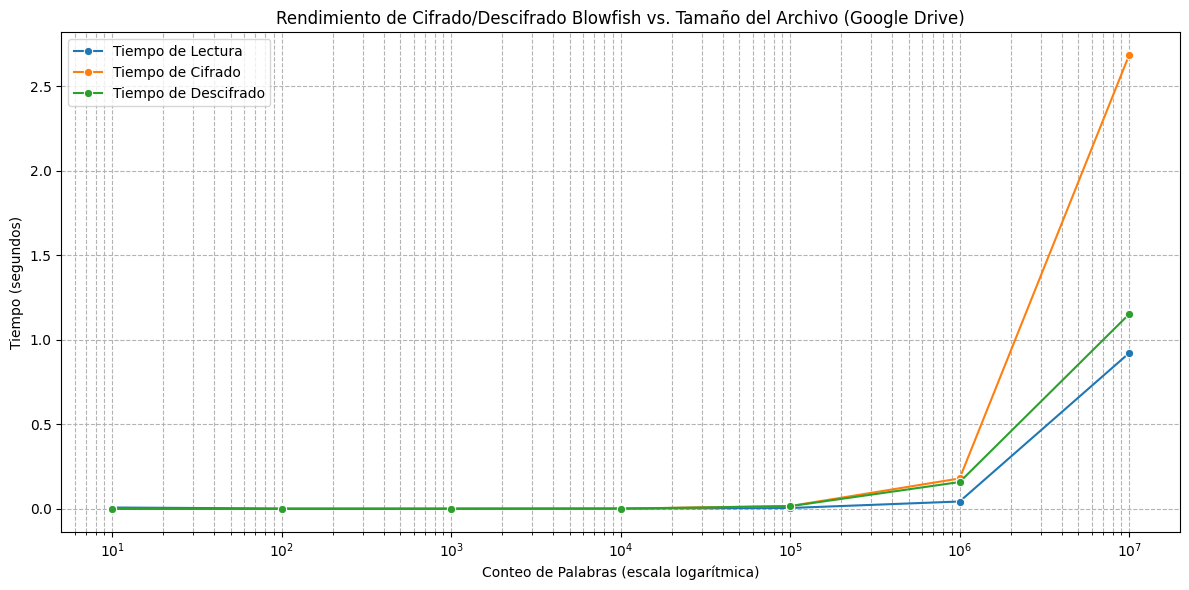

In [22]:
# Graficando los resultados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_drive_performance, x='word_count', y='read_time', label='Tiempo de Lectura', marker='o')
sns.lineplot(data=df_drive_performance, x='word_count', y='encrypt_time', label='Tiempo de Cifrado', marker='o')
sns.lineplot(data=df_drive_performance, x='word_count', y='decrypt_time', label='Tiempo de Descifrado', marker='o')

plt.xscale('log') # Usa escala logarítmica para el conteo de palabras debido al amplio rango
plt.title('Rendimiento de Cifrado/Descifrado Blowfish vs. Tamaño del Archivo (Google Drive)')
plt.xlabel('Conteo de Palabras (escala logarítmica)')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()


## Bibliografia

[1] B. Schneier, “Description of a New Variable-Length Key, 64-Bit Block Cipher (Blowfish),” Fast Software Encryption: Cambridge Security Workshop Proceedings, Lecture Notes in Computer Science vol. 809, Springer-Verlag, 1994, pp. 191-204.

[2] Google, "Colaboratory," Google. [Online]. Available: https://colab.research.google.com/. [Accessed: 30-oct-2025].